In [1]:
import numpy as np
import h5py
import pandas as pd
from glob import glob
import os
import re
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
# settings
color_pal = sns.color_palette()
plt.style.use("fivethirtyeight")

In [2]:
try:
    import package.src.PyBlastAfterglowMag as PBA
except ImportError:
    try:
        import PyBlastAfterglowMag as PBA
    except:
        raise ImportError("Cannot import PyBlastAfterglowMag")

In [3]:
from settings import *

In [4]:
df = pd.DataFrame(SIMULATIONS).T

In [5]:
# collect tmin tmax 
df["tmin"],df["tmax"] = pd.Series(dtype = 'object'), pd.Series(dtype = 'object')
for sim, sim_dic in df.iterrows():
    data = PBA.id_kenta.EjectaData(sim_dic["datadir"]+"ej_collated.h5",verbose=True)
    df["tmin"][sim] = np.array(data.getText().min())
    df["tmax"][sim] = np.array(data.getText().max())
print(df[["idx","tmin","tmax"]])

                 idx                  tmin                tmax
SFHo_q1_res150     0     4.986821174621582  56.988121032714844
SFHo_q111_res150   1  0.028825554996728897  58.025840759277344
SFHo_q116_res150   2    13.000324249267578   90.02220916748047
SFHo_q116_res200   3    3.0362918376922607   78.98201751708984
SFHo_q125_res150   4  0.028825554996728897   74.97526550292969
SFHo_q125_res200   5    54.321754455566406    61.0092887878418


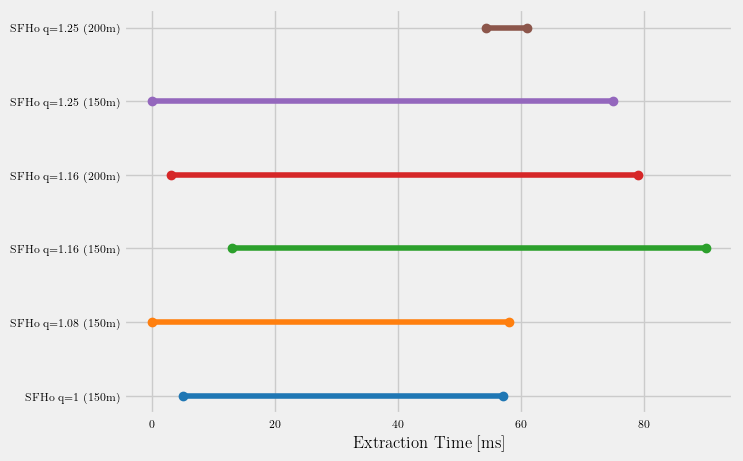

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
for sim, sim_dic in df.iterrows():
    ax.plot([sim_dic["tmin"],sim_dic["tmax"]],[sim_dic["idx"],sim_dic["idx"]], 
            marker="o", color=color_pal[sim_dic["idx"]])

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(["-1"] + df["label"].to_list() + ["10"])
ax.set_xlabel("Extraction Time [ms]", fontsize=12)
ax.minorticks_on()
plt.show()

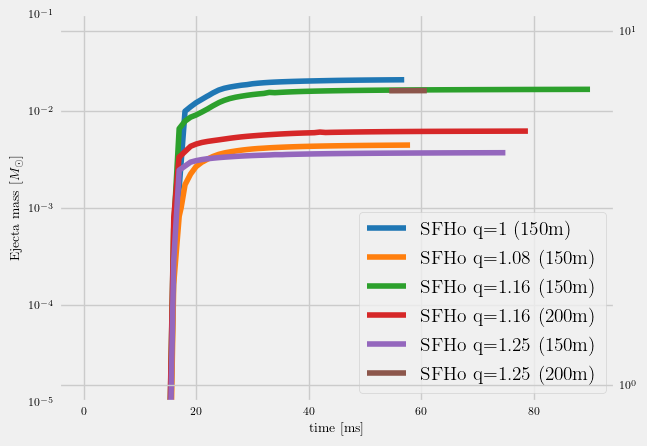

In [12]:
fig, ax = plt.subplots(ncols=1,nrows=1)
ax2 = ax.twinx()
for sim, sim_dic in df.iterrows():
    ej = PBA.id_kenta.EjectaData(sim_dic["datadir"]+"ej_collated.h5",verbose=True)
    data = PBA.id_kenta.Data(fpath_rhomax=sim_dic["datadir"]+sim_dic["rhomax"],
                             fpath_mdot=sim_dic["datadir"]+sim_dic["mdot_extract"])
    ax.plot(ej.getText(), ej.total_mass(), color=color_pal[sim_dic["idx"]],
            label=sim_dic["label"],ls="-")
    # ax.plot(ej.getText(), ej.total_mass_fasttail(),color=color_pal[sim_dic["idx"]],
    #         label=r"$\Gamma\beta>1$",ls="--")
    # ax2.plot(*data.get_rhomax(),color=color_pal[sim_dic["idx"]],label=r"$\rho_{\rm max}$",ls=":")
    # ax2.plot(*data.get_mdot(),color=color_pal[sim_dic["idx"]],label=r"$\dot{M}$",ls="-.")
ax.set_ylim(1e-5,1e-1)
ax2.set_yscale("log")
ax.legend(fontsize=14)
ax.set_yscale("log")
ax.set_xlabel("time [ms]")
ax.set_ylabel(r"Ejecta mass $[M_{\odot}]$")
plt.savefig(os.getcwd()+"/"+"ejecta_mass_evol.png",dpi=256)
plt.show()